In [1]:
import warnings
import pandas as pd
import numpy as np
import random as rd
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
import matplotlib.pylab as plt
from sklearn import metrics

In [2]:
def Data(name,num_x,num_sample):
    Data_x = np.array(name.iloc[num_sample:num_sample+5,1 :num_x+1])
    Data_y = np.array(name.iloc[num_sample:num_sample+5,num_x+1]).reshape(-1,1)
    return Data_x, Data_y

In [3]:
def Ridge_model(Data_x, Data_y, Alpha):
    model = Ridge(alpha = Alpha,fit_intercept=False)
    model.fit(Data_x,Data_y)
    return model

def Linear_model(Data_x, Data_y):
    model = LinearRegression(fit_intercept=False)
    model.fit(Data_x, Data_y)
    return model

In [4]:
def Graph(name, num_x, predict_ridge, predict_linear):
    Data_x = np.array(name.iloc[:,0])
    Data_y = np.array(name.iloc[:,num_x+1])
    plt.scatter(Data_x, Data_y, label = "sales")
    plt.plot(Data_x, predict_ridge, color="blue", label = "Ridge", linewidth=2)
    plt.plot(Data_x, predict_linear, "r-", label = "Linear", linewidth = 1)
    plt.xlabel("STT")
    plt.ylabel("Sales")
    plt.legend()
    plt.show()

In [5]:
file_train = pd.read_csv("E:\Python\Linear\Data\Train_Advertising.csv")
file_test = pd.read_csv("E:\Python\Linear\Data\Test_Advertising.csv")

num_sample = rd.randint(1,80)
x,y = Data(file_train,3,num_sample)
Beta_ridge = Ridge_model(x,y,50)
Beta_linear = Linear_model(x,y)
print(Beta_ridge.coef_)
print(Beta_linear.coef_)

[[0.04783352 0.25247661 0.03102532]]
[[0.04613295 0.26929563 0.02848696]]


In [6]:
Data_x_test = file_test.iloc[ :, 1:4]
Data_y_test = file_test.iloc[ :, 4]

predict_ridge = Beta_ridge.predict(Data_x_test)
predict_linear = Beta_linear.predict(Data_x_test)
print(predict_ridge,predict_linear, sep='\n')

[[13.26888458]
 [26.47321013]
 [16.61690733]
 [13.88586894]
 [20.21832599]
 [20.14165056]
 [ 4.89453255]
 [ 5.11968035]
 [ 1.52185781]
 [19.17894064]
 [14.62404695]
 [21.87525992]
 [12.36694973]
 [15.55889449]
 [16.62685994]
 [14.06401276]
 [11.06308936]
 [ 4.31563675]
 [17.7862652 ]
 [ 5.65946058]
 [14.95861889]
 [ 7.94168852]
 [11.80464686]
 [15.00871077]
 [21.43486539]
 [ 7.95386248]
 [11.7643226 ]
 [ 4.12168106]
 [23.00835905]
 [ 7.21778812]
 [10.30147754]
 [14.75171976]
 [ 7.33431856]
 [20.37101552]
 [13.54591473]
 [14.44047487]
 [11.35966136]
 [22.24081934]
 [ 9.2320045 ]
 [19.98088381]
 [ 8.20330921]
 [20.54853838]
 [20.10537373]
 [ 7.50977354]
 [ 9.54512308]
 [ 7.469976  ]
 [13.59782723]
 [25.37888708]
 [12.3616824 ]
 [ 9.29117635]
 [18.08423013]
 [ 9.4195921 ]
 [15.77516773]
 [19.38685755]
 [14.60513172]
 [ 3.30169042]
 [17.0410784 ]
 [ 8.24759579]
 [11.2783834 ]
 [12.01871992]
 [13.77358575]
 [14.66754327]
 [14.37590958]
 [17.34150688]
 [ 9.48503123]
 [14.70632724]
 [11.01948

c:\Users\FPT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
c:\Users\FPT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


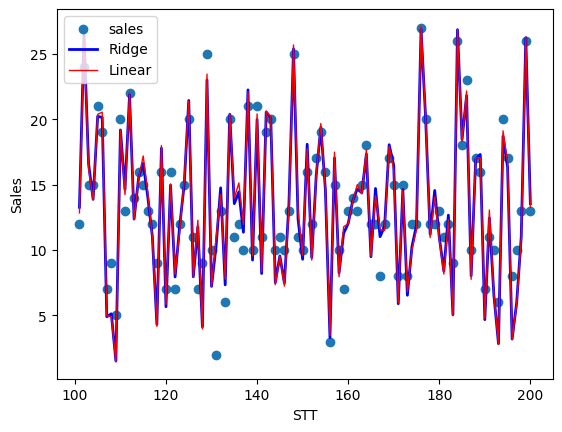

In [7]:
Graph(file_test,3,predict_ridge,predict_linear)

In [8]:
print(Beta_linear.score(Data_x_test, Data_y_test))
print(Beta_ridge.score(Data_x_test, Data_y_test))

warnings.filterwarnings("ignore", category=UserWarning)

0.8145447631577297
0.8296633771303782


c:\Users\FPT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
c:\Users\FPT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


In [9]:
ridge_win = 0
turn = 100
ridge_win_ = []
for j in range(turn):
    ridge_win = 0
    for i in range(turn):
        num = rd.randint(1,80)
        x,y = Data(file_train,3,num)
        Beta_ridge = Ridge_model(x,y,1)
        Beta_linear = Linear_model(x,y)
        predict_ridge = Beta_ridge.predict(Data_x_test)
        predict_linear = Beta_linear.predict(Data_x_test)
        if Beta_linear.score(Data_x_test, Data_y_test)<Beta_ridge.score(Data_x_test, Data_y_test):
            ridge_win += 1
    ridge_win_.append(ridge_win/turn)
    print(ridge_win/turn, end = ' ')

0.65 0.73 0.65 0.65 0.71 0.72 0.67 0.73 0.7 0.63 0.77 0.67 0.67 0.66 0.72 0.75 0.67 0.74 0.63 0.74 0.7 0.67 0.78 0.63 0.71 0.73 0.67 0.63 0.73 0.63 0.68 0.68 0.73 0.75 0.67 0.69 0.72 0.75 0.68 0.69 0.76 0.66 0.65 0.73 0.72 0.7 0.59 0.7 0.83 0.7 0.82 0.79 0.68 0.7 0.73 0.7 0.76 0.68 0.72 0.67 0.77 0.75 0.7 0.66 0.72 0.75 0.75 0.75 0.66 0.75 0.61 0.67 0.71 0.7 0.72 0.75 0.75 0.69 0.75 0.7 0.76 0.77 0.79 0.65 0.68 0.68 0.74 0.68 0.61 0.75 0.61 0.71 0.65 0.68 0.72 0.68 0.61 0.67 0.8 0.69 

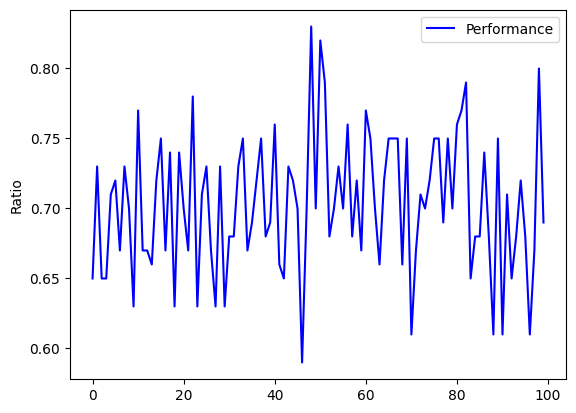

In [10]:
plt.plot(ridge_win_, label = 'Performance', color = 'blue')
plt.ylabel("Ratio")
plt.legend()
plt.show()